<a href="https://colab.research.google.com/github/PSuHyeon/Simple_TensorFlow/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import 명령어 (Used import_ipynb module)

In [26]:
!pip install import_ipynb
from google.colab import drive
drive.mount('/content/drive') 
import import_ipynb
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Colab 과 Google drive 환경에서 개발했기 때문에 추후에 import 주소 변경해야 할 수 있음. 
%run drive/MyDrive/Colab_Notebooks/Simple_tf/Functions.ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Testing Sin graph with its first, second, third order differentiation

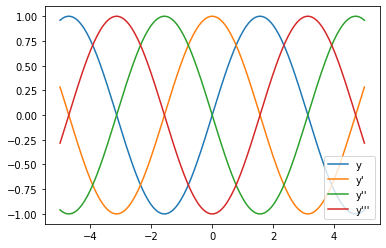

In [28]:
import matplotlib.pyplot as plt
x = Variable(np.linspace(-5, 5, 200)) 
y = sin(x)
y.backward(create_graph = True) 

logs = [y.data]

for i in range(3):
  logs.append(x.grad.data)
  gx = x.grad 
  x.cleargrad() 
  gx.backward(create_graph=True)
labels = ["y", "y'", "y''", "y'''"]
for i, v in enumerate(logs):
  plt.plot(x.data, logs[i], label = labels[i])
plt.legend(loc='lower right')
plt.show()

Testing efficiency for newton's method:

Newton's method works well since it automatically approximate learning rate using second order differentiation. However, calculating second order differentiation takes O(n^3), and therefore, it is not applicable for ordinary machine learning

In [29]:
x = Variable(np.array(2.0))
f = lambda x: x ** 4 - 2 * x ** 2
iter = 10 #only 10 iterations!

for i in range(iter):
  y = f(x)
  x.cleargrad()
  y.backward(create_graph=True)

  dx = x.grad
  x.cleargrad()
  dx.backward()
  ddx = x.grad

  x.data -= dx.data / ddx.data 

  print(x.data)


1.4545454545454546
1.1510467893775467
1.0253259289766978
1.0009084519430513
1.0000012353089454
1.000000000002289
1.0
1.0
1.0
1.0


In [30]:
x0 = Variable(np.array([1,2,3]))
x1 = Variable(np.array([10]))
y = x0 - x1
y.backward()
print(x1.grad)

variable([-3])


In [31]:
x = Variable(np.random.randn(2,3))
W = Variable(np.random.randn(3,4))

y = matmul(x, W)
y.backward()
print()
print(y)


variable([[-1.53384138  0.98765554 -0.32921517 -3.70605353]
          [ 0.02200258 -0.97604015  0.67659191 -0.54363972]])


In [32]:
def predict(x, W, b):
  y = matmul(x, W) + b
  return y

x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
w = Variable(np.zeros((1,1)))
b = Variable(np.zeros((1,1)))

lr = 0.1
iters = 100

for i in range(iters):
  y_pred = predict(x, w, b)
  loss = mean_squared_error(y, y_pred) 
  w.cleargrad()
  b.cleargrad()
  loss.backward()

  w.data -= lr * w.grad.data
  b.data -= lr * b.grad.data

  print(w, b, loss)

variable([[0.62329219]]) variable([[1.29185699]]) variable(42.126636727973384)
variable([[1.09223633]]) variable([[2.26830101]]) variable(24.071122183495614)
variable([[1.44464288]]) variable([[3.00654007]]) variable(13.77382404987508)
variable([[1.70906526]]) variable([[3.56488026]]) variable(7.901024102747971)
variable([[1.90706616]]) variable([[3.98735339]]) variable(4.55151126745009)
variable([[2.054929]]) variable([[4.30721152]]) variable(2.6410295966663684)
variable([[2.1649504]]) variable([[4.54956612]]) variable(1.5512305440805703)
variable([[2.24641625]]) variable([[4.73338103]]) variable(0.9294713538956461)
variable([[2.30633879]]) variable([[4.87297747]]) variable(0.5746406000743363)
variable([[2.35001325]]) variable([[4.97917072]]) variable(0.3720447865588527)
variable([[2.38143819]]) variable([[5.06012838]]) variable(0.25627434367344504)
variable([[2.40363299]]) variable([[5.12201861]]) variable(0.19002620180432964)
variable([[2.41887755]]) variable([[5.1694996]]) variable

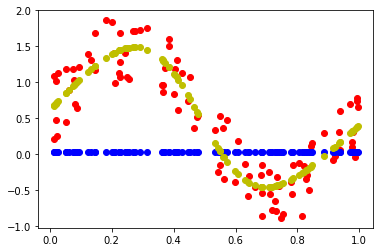

In [33]:
import matplotlib.pyplot as plt
x = Variable(np.random.rand(100, 1))
y = sin(2 * np.pi * x) + np.random.rand(100, 1)


iter = 10000 
lr = 0.2

W1 = Variable(0.01 * np.random.rand(1, 10)) 
B1 = Variable(np.zeros(10))
W2 = Variable(0.01 * np.random.rand(10, 1)) 
B2 = Variable(np.zeros(1))

def predict():
  y = linear(x, W1, B1)
  y = sigmoid(y)
  y = linear(y, W2, B2)
  return y
plt.plot(x.data, y.data, 'ro')
p_y = predict()
plt.plot(x.data, p_y.data, "bo")

for i in range(iter):
  y_pred = predict()
  loss = mean_squared_error(y, y_pred)
  W1.cleargrad()
  B1.cleargrad()
  W2.cleargrad()
  B2.cleargrad()

  loss.backward()

  W1.data -= lr * W1.grad.data
  B1.data -= lr * B1.grad.data
  W2.data -= lr * W2.grad.data
  B2.data -= lr * B2.grad.data

plt.plot(x.data, predict().data, "yo")
 

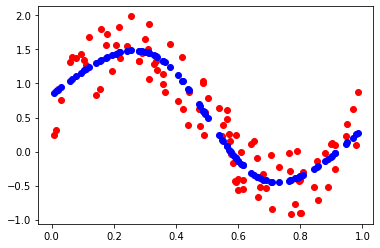

In [39]:
import matplotlib.pyplot as plt
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)
plt.plot(x, y, "ro")
model = MLP((10, 1))

lr = 0.2
iters = 10000
for i in range(iters):
  y_pred = model(x)
  loss = mean_squared_error(y, y_pred)
  model.cleargrads()
  loss.backward()
  # k = model.params()
  # print(k)
  for l in model.params():
    # print(l.grad)
    l.data -= lr * l.grad.data
  
  # if (iters % 1000 == 0):
  #   print(loss)

plt.plot(x, model(x).data, "bo")
  